# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [62]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [119]:
# set seed so that I can actually test things without the randomizer messing things up
np.random.seed(123)
n = 64
x = np.linspace(0,1,n) + np.random.rand(4,n)
# put the ones at the beginning because I like the first coefficient to be beta zero
x = np.vstack([np.ones(len(x.T)), x]).T
y = np.linspace(0,1,n) + np.random.rand(n) - 1

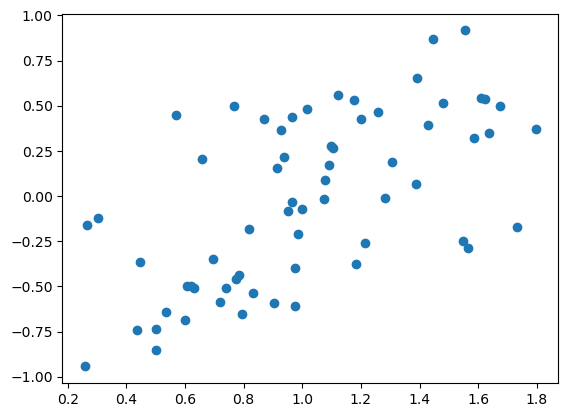

In [102]:
plt.scatter(x.T[1],y)

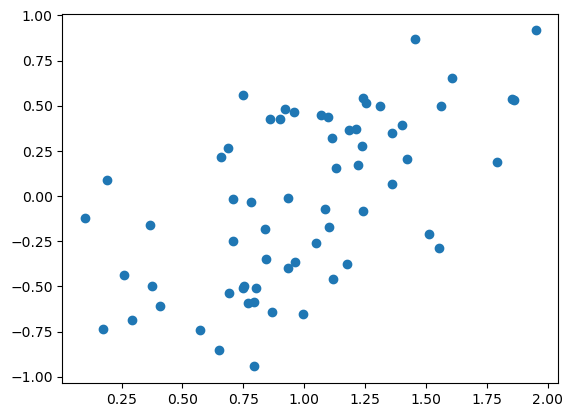

In [103]:
plt.scatter(x.T[2],y)

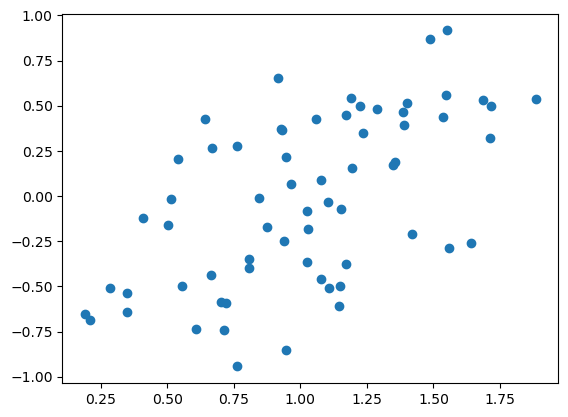

In [104]:
plt.scatter(x.T[3],y)

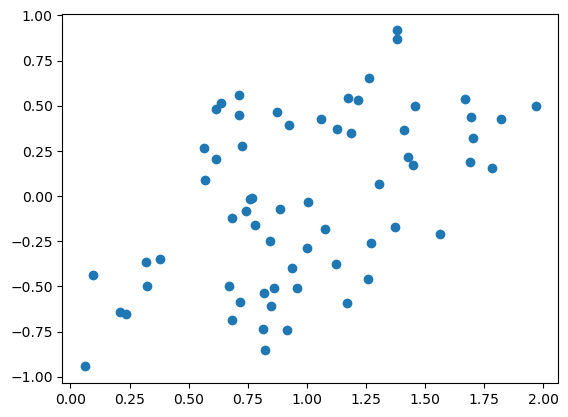

In [105]:
plt.scatter(x.T[4],y)

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

$\beta = (X^TX)^{-1}Y^TX$

In [137]:
beta = np.dot(np.linalg.inv(np.dot(x.T,x)), np.dot(y.T,x))
print(beta)

[-0.98604904  0.36086932  0.25127869  0.23263096  0.11111903]


In [138]:
#check
beta2 = np.linalg.lstsq(x,y, rcond=-1)[0]
print(beta2)

[-0.98604904  0.36086932  0.25127869  0.23263096  0.11111903]


In [139]:
p = np.dot(x,beta)
print(p)

[-0.29321354 -0.68069916 -0.50861392 -0.57221907 -0.47359985 -0.32946556
 -0.2356857  -0.37824818 -0.37355329 -0.47120698 -0.52899059 -0.16857557
 -0.39859234 -0.59450492 -0.3643324  -0.10722987 -0.4174499  -0.31016667
 -0.12119042 -0.33916682 -0.00900048  0.13342781 -0.21666784 -0.17048169
 -0.19776834 -0.2831239  -0.03513668 -0.19721107 -0.16474038  0.18972297
 -0.16029465  0.01894425 -0.10305962 -0.01882585 -0.07287006 -0.1804488
  0.01337558  0.26007485  0.06312323  0.0460841   0.12805678  0.06730944
  0.25272864 -0.02167551  0.4423649   0.18388707  0.23743609  0.27127715
 -0.00764957  0.27302276  0.10396207  0.36517018  0.30752187  0.22563206
  0.11152038  0.43336058  0.43926555  0.45356453  0.30827386  0.40160438
  0.68880911  0.57916359  0.31406806  0.62961459]


## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

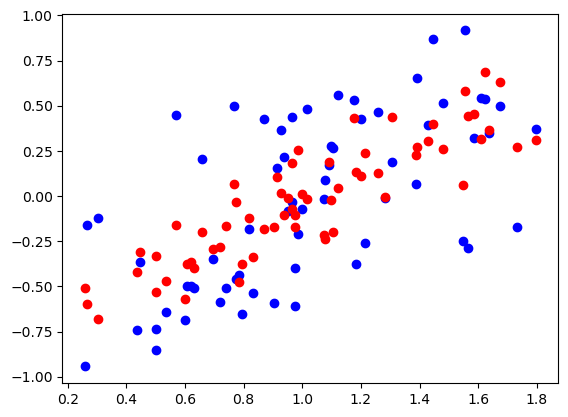

In [140]:
# real values = blue, prediction = red
plt.scatter(x.T[1], y, c='blue')
plt.scatter(x.T[1], p, c='red')

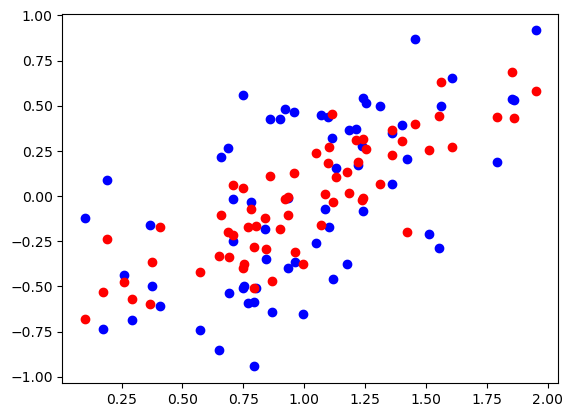

In [141]:
# real values = blue, prediction = red
plt.scatter(x.T[2], y, c='blue')
plt.scatter(x.T[2], p, c='red')

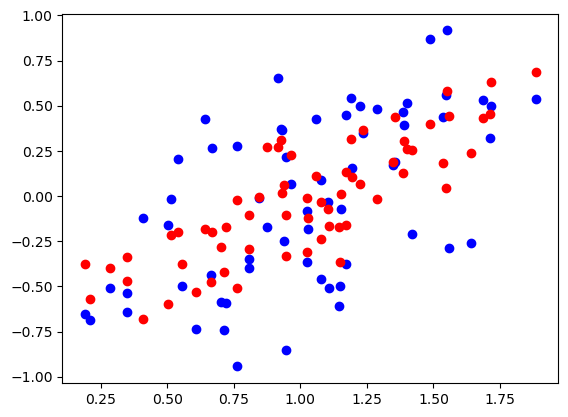

In [142]:
# real values = blue, prediction = red
plt.scatter(x.T[3], y, c='blue')
plt.scatter(x.T[3], p, c='red')

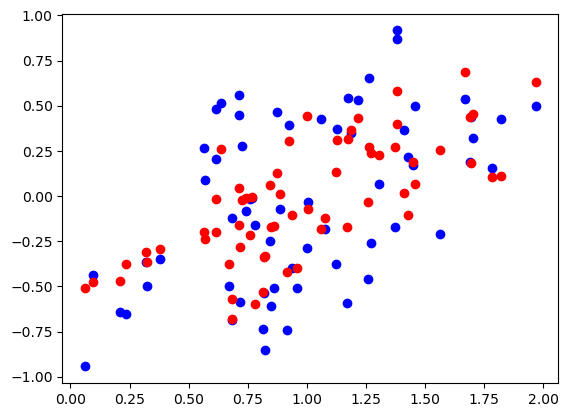

In [143]:
# real values = blue, prediction = red
plt.scatter(x.T[4], y, c='blue')
plt.scatter(x.T[4], p, c='red')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [144]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [173]:
columns = ['Income', 'Limit', 'Education', 'Age', 'Balance']
X = credit[columns].values
X = np.vstack([np.ones(len(X)), X.T]).T
X

array([[1.00000e+00, 1.48910e+01, 3.60600e+03, 1.10000e+01, 3.40000e+01,
        3.33000e+02],
       [1.00000e+00, 1.06025e+02, 6.64500e+03, 1.50000e+01, 8.20000e+01,
        9.03000e+02],
       [1.00000e+00, 1.04593e+02, 7.07500e+03, 1.10000e+01, 7.10000e+01,
        5.80000e+02],
       ...,
       [1.00000e+00, 5.78720e+01, 4.17100e+03, 1.20000e+01, 6.70000e+01,
        1.38000e+02],
       [1.00000e+00, 3.77280e+01, 2.52500e+03, 1.30000e+01, 4.40000e+01,
        0.00000e+00],
       [1.00000e+00, 1.87010e+01, 5.52400e+03, 7.00000e+00, 6.40000e+01,
        9.66000e+02]])

In [174]:
z = credit['Rating']
z

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [175]:
beta_credit = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(z.T,X))
print(beta_credit)

[ 4.75140526e+01  1.32064098e-01  6.25891484e-02 -3.44829447e-01
  3.25811876e-02  1.51557697e-02]


In [176]:
#check
beta_credit2 = np.linalg.lstsq(X,z, rcond=-1)[0]
print(beta_credit2)

[ 4.75140526e+01  1.32064098e-01  6.25891484e-02 -3.44829447e-01
  3.25811876e-02  1.51557697e-02]


In [185]:
p_credit = np.dot(X,beta_credit)

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

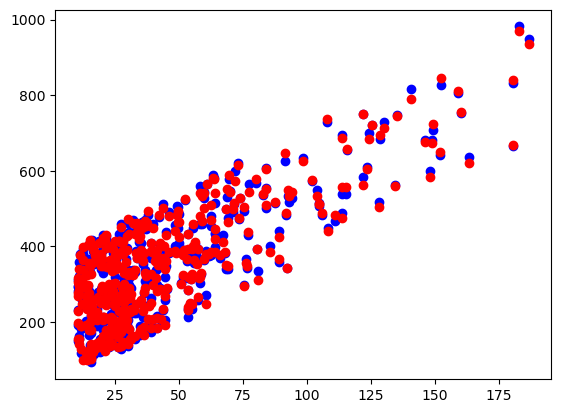

In [184]:
# real values = blue, prediction = red
plt.scatter(X.T[1], z, c='blue')
plt.scatter(X.T[1], p_credit, c='red')

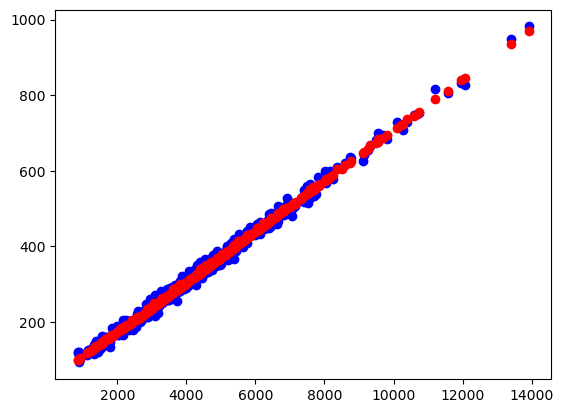

In [179]:
# real values = blue, prediction = red
plt.scatter(X.T[2], z, c='blue')
plt.scatter(X.T[2], p_credit, c='red')

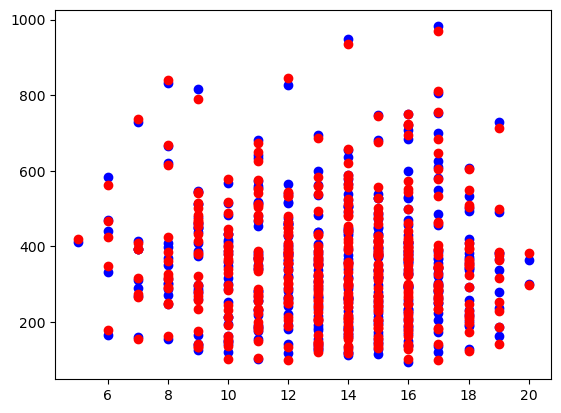

In [180]:
# real values = blue, prediction = red
plt.scatter(X.T[3], z, c='blue')
plt.scatter(X.T[3], p_credit, c='red')

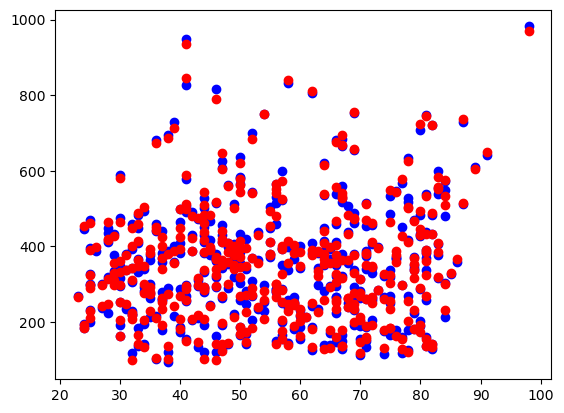

In [181]:
# real values = blue, prediction = red
plt.scatter(X.T[4], z, c='blue')
plt.scatter(X.T[4], p_credit, c='red')

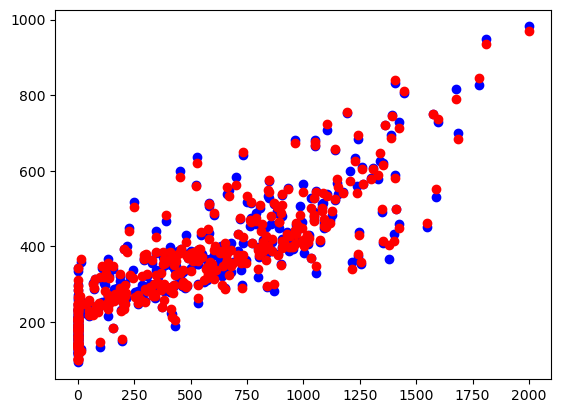

In [182]:
# real values = blue, prediction = red
plt.scatter(X.T[5], z, c='blue')
plt.scatter(X.T[5], p_credit, c='red')